# First look at Data 
###### 2017-09-17

In [288]:
import pandas as pd
import numpy as np

In [289]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [290]:
titanic_df = pd.read_csv('train.csv')

In [291]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [292]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


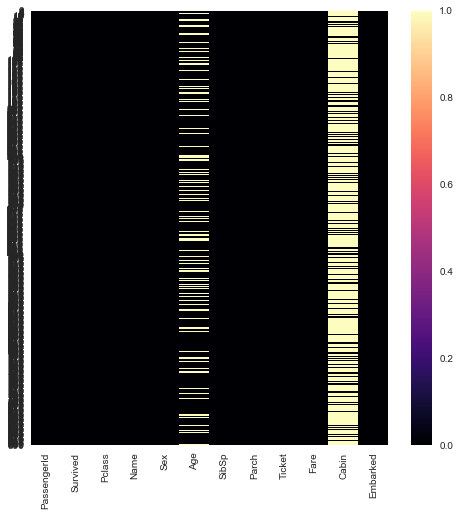

In [293]:
# Columns cabin and Age have several missing attributess
plt.figure(figsize=(8,8))
sns.heatmap(titanic_df.isnull(), cmap='magma')

# Results 
From the heatmap one can infer that there's a lot of data missing on Cabin and Fields 
One can clean this data and fill the missing information regarding the age. On the other hand gathering information about the Cabin might be difficult has there are so few values about it.

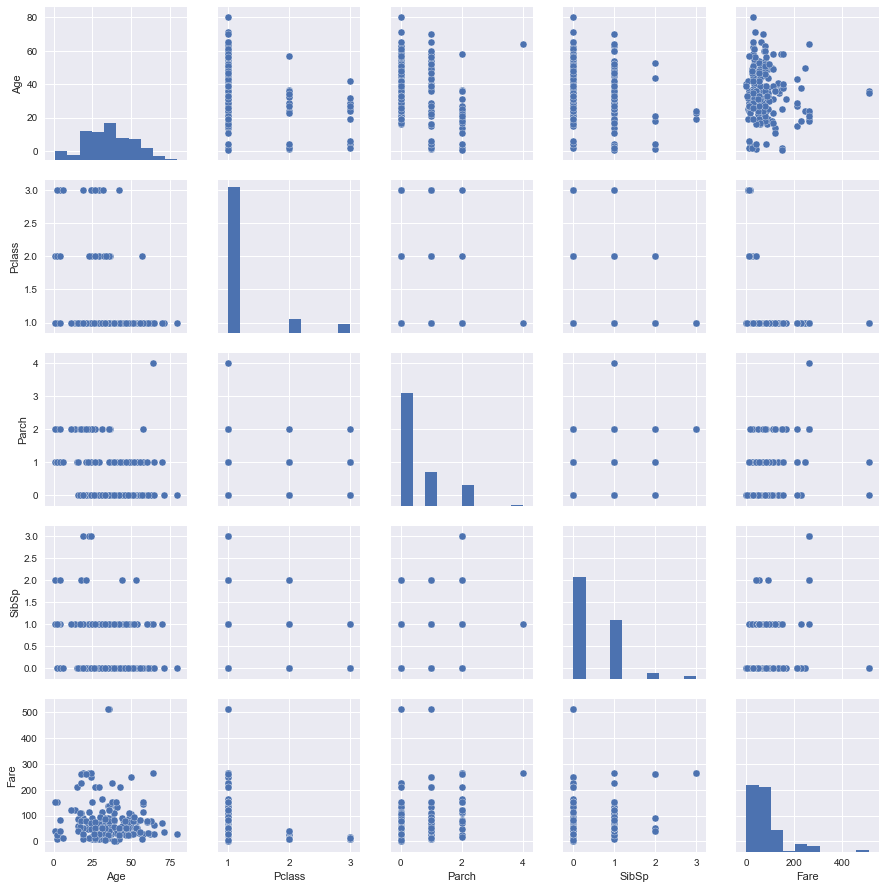

In [294]:
# Find relations between Age and other features
sns.pairplot(titanic_df.dropna(axis=0)[['Age', 'Pclass', 'Sex', 'Parch', 'SibSp', 'Fare', 'Embarked']])

- It seems that younger people travel in the third class(Pclass=3). 
- It seems that older people tend to have less parch relationships.

##### There's one relation that we could try as well ... 
Parsing the name and retrieving the titles for each feature.

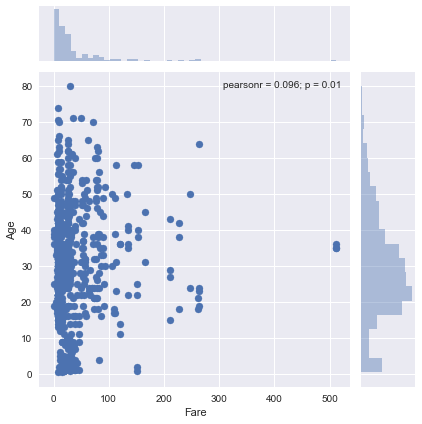

In [295]:
sns.jointplot(x='Fare', y='Age', data=titanic_df)

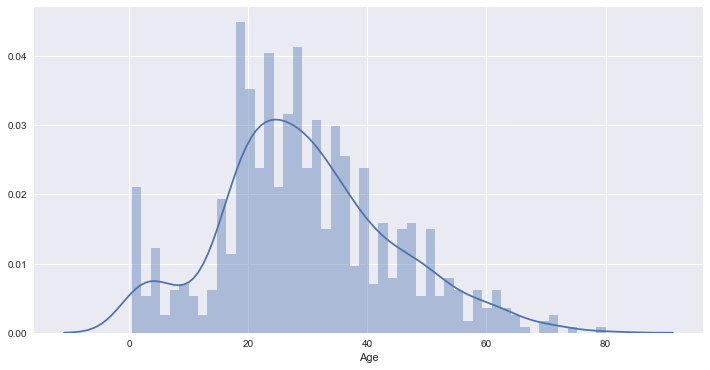

In [296]:
plt.figure(figsize=(12,6))
sns.distplot(a=titanic_df['Age'].dropna(), bins=50)

In [297]:
import string
import re

def parseTitles(names):
    titles = []
    titles_pattern = '.+, ([a-zA-Z]+\.) .+'
    pattern = re.compile(titles_pattern) 
    
    for name in names:
        result = pattern.match(name) 
        
        title = result.group(1) if (result != None) else 'NaN'
        
        if title not in titles: 
            titles += [title]
            
    return titles
           

titles = parseTitles(titanic_df['Name'])
titles

['Mr.',
 'Mrs.',
 'Miss.',
 'Master.',
 'Don.',
 'Rev.',
 'Dr.',
 'Mme.',
 'Ms.',
 'Major.',
 'Lady.',
 'Sir.',
 'Mlle.',
 'Col.',
 'Capt.',
 'NaN',
 'Jonkheer.']

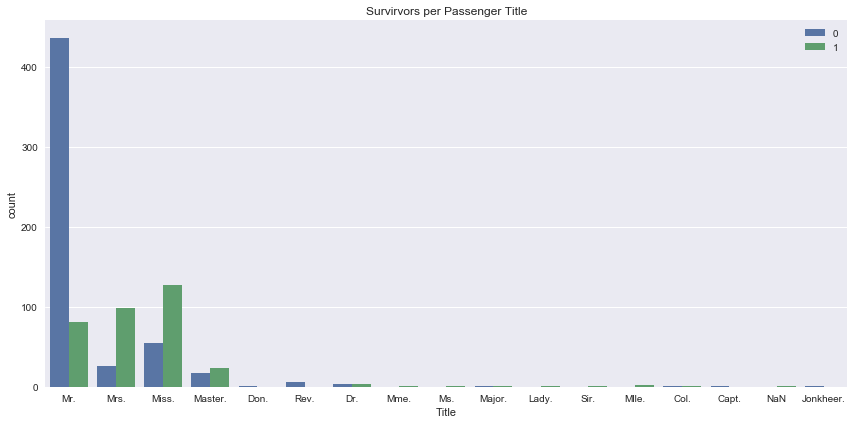

In [298]:
titanic_df['Title'] = titanic_df.apply(lambda person: parseTitles([person['Name']])[0], axis=1)
titanic_df.head()

plt.figure(figsize=(12, 6))
sns.countplot(x='Title', data=titanic_df, hue='Survived')
plt.title('Survirvors per Passenger Title')
plt.legend(title='', loc = 'upper right')
plt.tight_layout()

In [310]:
# There's no need to append two columns with the same data. There are only two categories, they're exclusive
titanic_df['Sexlog'] = pd.get_dummies(titanic_df['Sex'])['female']
titanic_df.head()

KeyError: 'Sex'

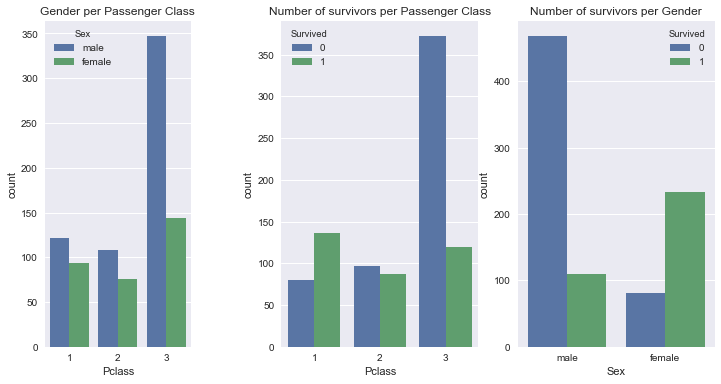

In [300]:
plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

plt.subplot(1, 4, 1)
sns.countplot(x='Pclass', data=titanic_df, hue='Sex')
plt.title('Gender per Passenger Class')

plt.subplot(1,3,2)
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')
plt.title('Number of survivors per Passenger Class')

plt.subplot(1,3,3)
sns.countplot(x='Sex', data=titanic_df, hue='Survived')
plt.title('Number of survivors per Gender')

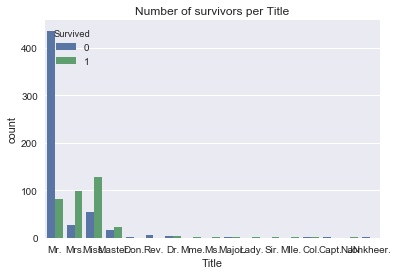

In [301]:
sns.countplot(x='Title', data=titanic_df, hue='Survived')
plt.title('Number of survivors per Title')

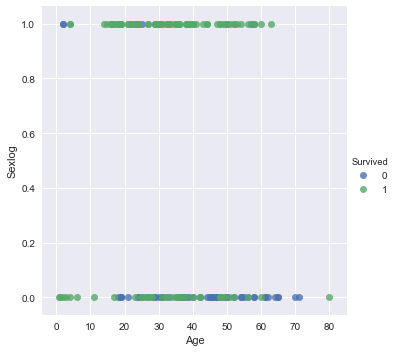

In [302]:
sns.lmplot(x='Age', y='Sexlog', hue='Survived', data=titanic_df.dropna(axis=0), fit_reg=False)

In [303]:
titanic_df[['Embarked', 'Pclass', 'Age', 'Fare']].groupby('Embarked').mean()

,Pclass,Age,Fare
Embarked,,,
C,1.886905,30.814769,59.954144
Q,2.909091,28.089286,13.276030
S,2.350932,29.445397,27.079812


It seems to be a relation between the Port of Embarkation and the class and Fare that each passenger paid.

In [304]:
titanic_df.drop(labels=['Name', 'PassengerId', 'Cabin', 'Sex', 'Ticket'], axis=1, inplace=True)


In [305]:
feat_corr = pd.get_dummies(titanic_df.drop('Title', axis=1)).corr()
feat_corr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sexlog,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.063036


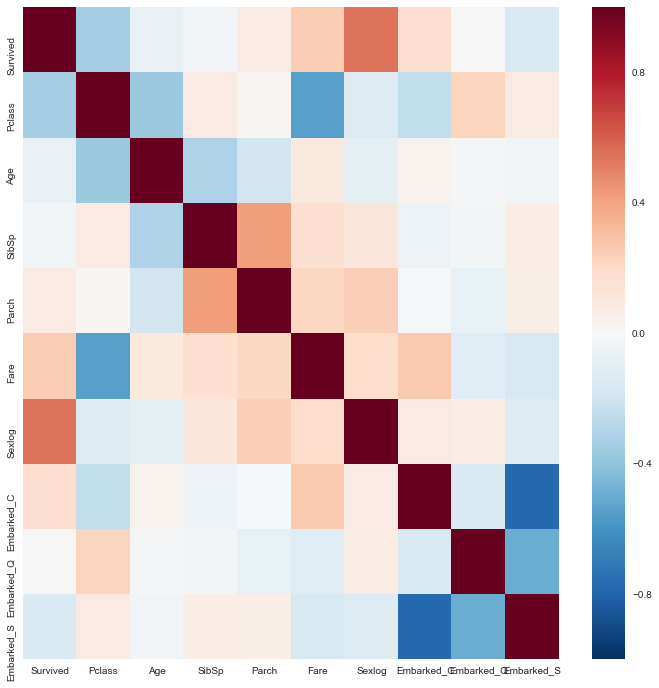

In [306]:
plt.figure(figsize=(12,12))
sns.heatmap(data=feat_corr)

Age will be estimated based on the fares as it seems to be the feature that brings more information.

In [327]:
title_age = titanic_df[['Age', 'Title']].groupby('Title').mean()
titanic_df.info()

DataError: No numeric types to aggregate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null object
Pclass      891 non-null object
Age         714 non-null object
SibSp       891 non-null object
Parch       891 non-null object
Fare        891 non-null object
Embarked    891 non-null object
Title       891 non-null object
Sexlog      891 non-null object
dtypes: object(9)
memory usage: 62.7+ KB


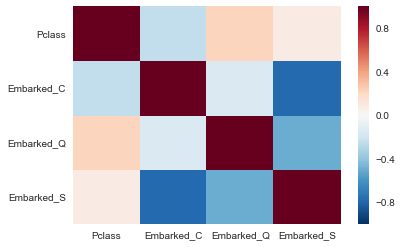

In [321]:
sns.heatmap(pd.get_dummies(titanic_df[['Embarked', 'Pclass']]).corr())

In [329]:
df['Embarked'].fillna('Q')

KeyError: 'Embarked'

We'll assume that the missing data regarding embarks was from Q port.